### Optical IQ Modulation

Mach-zender_interferometer_IQ modulation_main



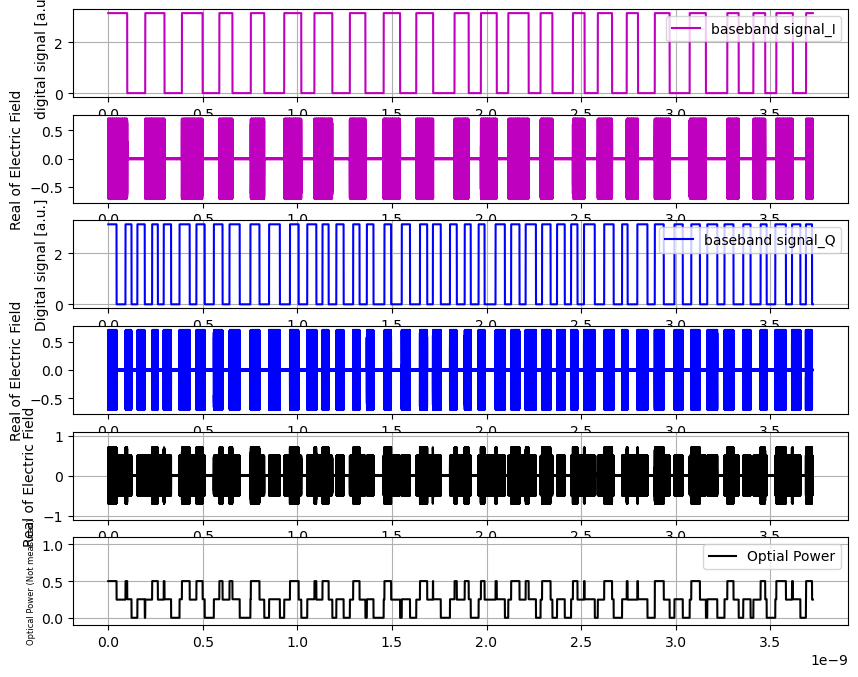

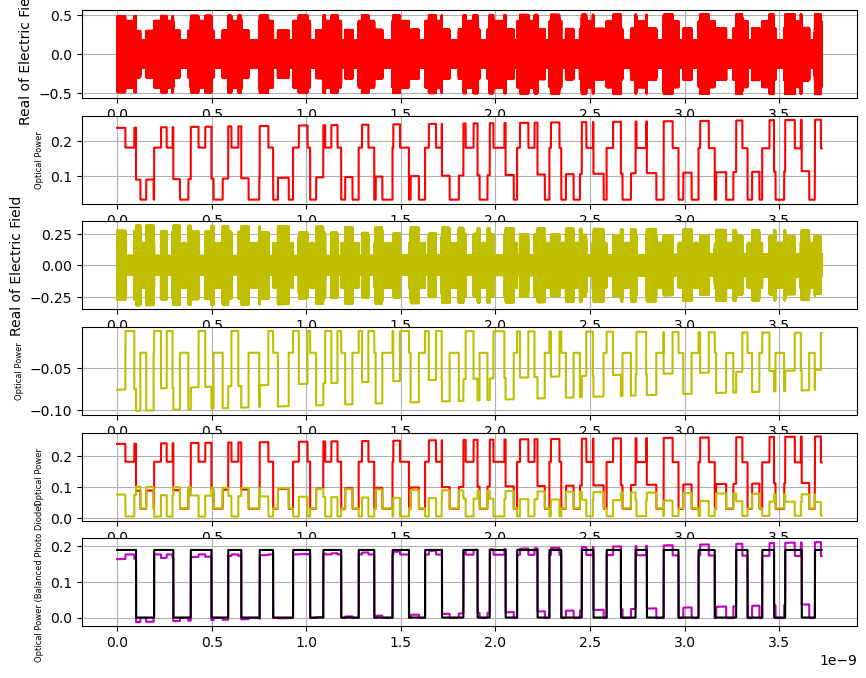

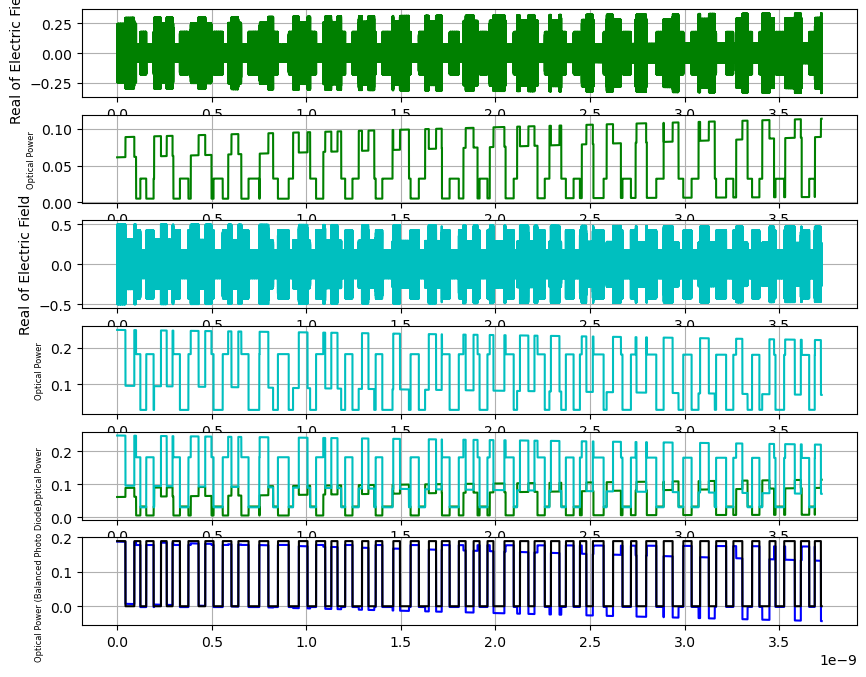

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c 
import mach_zender_interferometer_time_def

print('Mach-zender_interferometer_IQ modulation_main')
print('')

# Wavelength
wl1 = 1550e-9
# Optical Frequency
opticalfreq1 = c / wl1

samplerate = 2 ** 18 # samplerate: Number of Points
stept = 2 ** -46 #[s]
tcol = np.linspace(0.0, stept * samplerate, samplerate, endpoint=False)


#prbs pseudo random signal
amp_prbs = 1*np.pi

# Random_signal generation
a1_range = [0, 1]# amplitude range
a1 = np.random.rand(samplerate) * (a1_range[1]-a1_range[0]) + a1_range[0] 

# Pseudo Random On-Off level Digital signal, Type 1

# Arm A
b1_range = [2**12, 2**13]# frequency range
b1 = np.random.rand(samplerate) *(b1_range[1]-b1_range[0]) + b1_range[0] 
b1 = np.round(b1)
b1 = b1.astype(int)

b1[0] = 0

for i in range(1,np.size(b1)):
    b1[i] = b1[i-1]+b1[i]

#i=0
#random_signal = np.zeros(samplerate, dtype=complex)
#while b1[i]<np.size(random_signal):
#    k = b1[i]
#    random_signal[k:] = a1[i]
#    i=i+1

a1 = np.zeros(samplerate, dtype=complex)
j = 0
while j < samplerate:
    a1[j] = amp_prbs
    a1[j+1] = 0
    j = j+2

i=0
prbs1a = np.zeros(samplerate, dtype=complex)
while b1[i]<np.size(prbs1a):
    k = b1[i]
    prbs1a[k:] = a1[i]
    i=i+1

# Arm B
b2_range = [2**11, 2**12]
b2 = np.random.rand(samplerate) *(b2_range[1]-b2_range[0]) + b2_range[0] # range for frequency
b2 = np.round(b2)
b2 = b2.astype(int)

b2[0] = 0

for i in range(1,np.size(b2)):
    b2[i] = b2[i-1]+b2[i]

#i=0
#random_signal2 = np.zeros(samplerate, dtype=complex)
#while b2[i]<np.size(random_signal2):
#    k = b2[i]
#    random_signal2[k:] = a1[i]
#    i=i+1

a2 = np.zeros(samplerate, dtype=complex)
j = 0
while j < samplerate:
    a2[j] = amp_prbs
    a2[j+1] = 0
    j = j+2

i=0
prbs1b = np.zeros(samplerate, dtype=complex)
while b2[i]<np.size(prbs1b):
    k = b2[i]
    prbs1b[k:] = a2[i]
    i=i+1


# Pseudo Random multilevel Digital signal, Type 2
#numberofpointspersinal = 2 ** 6
#repetitions2 = samplerate / numberofpointspersinal

#rand_int2a = np.random.randint(0, 3, numberofpointspersinal) # 0, 1 or 2.
#prbs2a = np.pi * (1/4) * np.repeat(rand_int2a, repetitions2)

#rand_int2b = np.random.randint(0, 3, numberofpointspersinal) # 0 or 1
#prbs2b = np.pi * (1/4) * np.repeat(rand_int2b, repetitions2)


# rand_int1 = 0.5*np.pi * np.random.randint(0, 4, samplerate) # 0 to 3


#----
#randomintcol = np.zeros(samplerate)
#for ii in range(samplerate):
#    randomintcol[ii] = np.random.random_integers(2)



#I
signal_I = prbs1a # Pseudo Random On-Off level Digital signal, Type 1

#Q
signal_Q = prbs1b # Pseudo Random On-Off level Digital signal, Type 1

oplcommon1 = 1 * np.pi #Common Path Length

PT1 = 0.5 # Power Transmission(PT) of first beam splitter
PT2_1 = 0.505 # PT of second beam splitter of arm A
PT2_2 = 0.505 # PT of second beam splitter of arm B
PT3_1 = 0.505 # PT of third beam splitter of arm A
PT3_2 = 0.505 # PT of third beam splitter of arm B
PT4 = 0.505 # PT of fourth beam splitter
PT5 = 0.505 # PT of fifth beam splitter
PT6_1 = 0.505 # PT of sixth beam splitter 1
PT6_2 = 0.505 # PT of sixth beam splitter 2

IPB1 = 0.5 * np.pi #In Phase Bias: Optical Phase delay between Arm A and B
IPB2 = 0.005 * np.pi #In Phase Bias: Optical Phase delay between Arm A and B

# Define Input Electric Field

# Port 1 only
E1in = np.array([[1+0.j],[0-0.0j]])
#E1in = np.array([[0.707+0.707j],[0]])
#E1in = np.array([[-1+0j],[0-0.00j]])

E6out_p1_col = np.zeros(samplerate, dtype=complex)
E6out_p2_col = np.zeros(samplerate, dtype=complex)

E7out_p1_col = np.zeros(samplerate, dtype=complex)
E7out_p2_col = np.zeros(samplerate, dtype=complex)

E9_1out_port1col= np.zeros(samplerate, dtype=complex)
E9_1out_port2col= np.zeros(samplerate, dtype=complex)

E9_2out_port1col= np.zeros(samplerate, dtype=complex)
E9_2out_port2col= np.zeros(samplerate, dtype=complex)


for ii in range(samplerate):

    #Transmitter Tx

    t = tcol[ii]
    opl1 = 2*np.pi * opticalfreq1 * t

    E1out = mach_zender_interferometer_time_def.propagate1(opl1, opl1, E1in)
    E2in = E1out
    
    E2out = mach_zender_interferometer_time_def.beamsplitter(PT1, E2in)

    #Arm 1
    E3_1in = np.array([[E2out[0,0]],[0+0j]])
    E3_1out = mach_zender_interferometer_time_def.beamsplitter(PT2_1, E3_1in)  

    E4_1in = E3_1out       

    signal1 = signal_I[ii]

    E4_1out = mach_zender_interferometer_time_def.propagate1(oplcommon1, oplcommon1+signal1, E4_1in) # Each path experience different path length
    E5_1in = E4_1out
    
    E5_1out = mach_zender_interferometer_time_def.beamsplitter(PT3_1, E5_1in) # Each path enter second beam splitter
    E6_1in = E5_1out

    E6_1out = mach_zender_interferometer_time_def.propagate1(oplcommon1, oplcommon1, E6_1in) # no delay for arm A

    E6out_port1 = E6_1out[0,0] #trans
    E6out_p1_col[ii] = E6out_port1 

    #Arm 2
    #E3_2in = np.array([[0+0j], [E2out[1,0]]])
    E3_2in = np.array([[E2out[1,0]], [0+0j]])   

    E3_2out = mach_zender_interferometer_time_def.beamsplitter(PT2_2, E3_2in)
    E4_2in = E3_2out
 
    signal2 = signal_Q[ii]        

    E4_2out = mach_zender_interferometer_time_def.propagate1(oplcommon1, oplcommon1+signal2, E4_2in) # Each path experience different path length
    E5_2in = E4_2out

    E5_2out = mach_zender_interferometer_time_def.beamsplitter(PT3_2, E5_2in) # Each path enter second beam splitter
    E6_2in = E5_2out

    E6_2out = mach_zender_interferometer_time_def.propagate1(oplcommon1+IPB1, oplcommon1+IPB1, E6_2in) # Delay for arm B. Actually only one path couple to fourth beam splitter

    E6out_port2 = E6_2out[0,0] #trans
    E6out_p2_col[ii] = E6out_port2


    # Combine I + Q using fourth beam splitter

    E7_in = np.array([[E6_1out[0,0]], [E6_2out[0,0]]])

    E7_out = mach_zender_interferometer_time_def.beamsplitter(PT4, E7_in) # Each path enter fourth beam splitter   

    E7out_port1 = E7_out[0,0] #trans
    E7out_p1_col[ii] = E7out_port1 

    E7out_port2 = E7_out[1,0] #reflect
    E7out_p2_col[ii] = E7out_port2

    #Receiver Rx

    E8_in = E7out_port1

    E8_out = mach_zender_interferometer_time_def.beamsplitter(PT5, E8_in) # Each path enter fifth beam splitter   
    

    # Wavelength of receiver
    wl2 = wl1 +0.1e-12
    # Optical Frequency
    opticalfreq2 = c / wl2

    opl2 = 2*np.pi * opticalfreq2 * t


    #Absolute phase of Local Oscillator of Receiver
    losc_I_phase = opl2+0.05
    losc_Q_phase = losc_I_phase + IPB2

    Elosc_I = mach_zender_interferometer_time_def.propagate1(losc_I_phase, losc_I_phase, np.array([[0.25+0.0j],[0.0-0.0j]]))
    
    # Actually only one path couple to fourth beam splitter  
    Elosc_Q = mach_zender_interferometer_time_def.propagate1(losc_Q_phase, losc_Q_phase, np.array([[0.25+0.0j],[0.0-0.0j]]))

    E9_1in = np.array([[E8_out[0,0]], [Elosc_I[0,0]]])

    E9_2in = np.array([[E8_out[1,0]], [Elosc_Q[0,0]]])


    E9_1out = mach_zender_interferometer_time_def.beamsplitter(PT6_1, E9_1in) # Each path enter sixth beam splitter   
    
    E9_2out = mach_zender_interferometer_time_def.beamsplitter(PT6_2, E9_2in) # Each path enter sixth beam splitter

    E9_1out_port1 = E9_1out[0,0] #trans
    E9_1out_port1col[ii] = E9_1out_port1

    E9_1out_port2 = E9_1out[1,0] #Reflect
    E9_1out_port2col[ii] = E9_1out_port2

    E9_2out_port1 = E9_2out[0,0] #trans
    E9_2out_port1col[ii] = E9_2out_port1

    E9_2out_port2 = E9_2out[1,0] #Reflect
    E9_2out_port2col[ii] = E9_2out_port2


fig1 = plt.figure(figsize = (10,8), facecolor='white')
ax11 = fig1.add_subplot(6, 1, 1)
ax12 = fig1.add_subplot(6, 1, 2)
ax13 = fig1.add_subplot(6, 1, 3)
ax14 = fig1.add_subplot(6, 1, 4)
ax15 = fig1.add_subplot(6, 1, 5)
ax16 = fig1.add_subplot(6, 1, 6)

ax11.plot(tcol,signal_I, "-", color="m",label="baseband signal_I")
ax11.legend()
ax11.set_ylabel("digital signal [a.u.]")
#ax1.set_ylim(-1*np.pi,np.pi)
ax11.grid()

ax12.plot(tcol,np.real(E6out_p1_col), "-",color="m")
ax12.set_ylabel("Real of Electric Field")

ax13.plot(tcol,signal_Q, "-",color="b",label="baseband signal_Q")
ax13.legend()
ax13.set_ylabel("Digital signal [a.u.]")
ax13.grid()

ax14.plot(tcol,np.real(E6out_p2_col), "-",color="b")
ax14.set_ylabel("Real of Electric Field")

ax15.plot(tcol,np.real(E7out_p1_col), "-",color="k")
ax15.set_ylim(-1.1,1.1)
ax15.set_ylabel("Real of Electric Field")
ax15.grid()

ax16.plot(tcol,(np.abs(E7out_p1_col))**2, "-",color="k", label="Optial Power")
ax16.legend()
ax16.set_ylim(-0.1,1.1)
ax16.set_ylabel("Optical Power (Not measured)",{"fontsize": 6})
ax16.grid()

fig2 = plt.figure(figsize = (10,8), facecolor='white')
ax21 = fig2.add_subplot(6, 1, 1)
ax22 = fig2.add_subplot(6, 1, 2)
ax23 = fig2.add_subplot(6, 1, 3)
ax24 = fig2.add_subplot(6, 1, 4)
ax25 = fig2.add_subplot(6, 1, 5)
ax26 = fig2.add_subplot(6, 1, 6)

ax21.plot(tcol, np.real(E9_2out_port1col), "-",color="r")
ax21.set_ylabel("Real of Electric Field")
ax21.grid()

ax22.plot(tcol, (np.abs(E9_2out_port1col))**2, "-",color="r")
ax22.set_ylabel("Optical Power",{"fontsize": 6})
ax22.grid()

ax23.plot(tcol, np.real(E9_2out_port2col), "-",color="y")
ax23.set_ylabel("Real of Electric Field")
ax23.grid()

ax24.plot(tcol, -1*(np.abs(E9_2out_port2col))**2, "-",color="y")
ax24.set_ylabel("Optical Power",{"fontsize": 6})
ax24.grid()

ax25.plot(tcol, (np.abs(E9_2out_port1col))**2, "-", color="r")
ax25.plot(tcol, (np.abs(E9_2out_port2col))**2, "-", color="y")
ax25.set_ylabel("Optical Power",{"fontsize": 6})
ax25.grid()

ax26.plot(tcol, (np.abs(E9_2out_port1col))**2 - (np.abs(E9_2out_port2col))**2, "-",color="m")
ax26.plot(tcol, 0.06*signal_I, "-", color="k")
ax26.set_ylabel("Optical Power (Balanced Photo Diode)",{"fontsize": 6})
#ax26.set_ylim(-0.1,0.6)
ax26.grid()


fig3 = plt.figure(figsize = (10,8), facecolor='white')
ax31 = fig3.add_subplot(6, 1, 1)
ax32 = fig3.add_subplot(6, 1, 2)
ax33 = fig3.add_subplot(6, 1, 3)
ax34 = fig3.add_subplot(6, 1, 4)
ax35 = fig3.add_subplot(6, 1, 5)
ax36 = fig3.add_subplot(6, 1, 6)

ax31.plot(tcol, np.real(E9_1out_port1col), "-",color="g")
ax31.set_ylabel("Real of Electric Field")
ax31.grid()

ax32.plot(tcol, (np.abs(E9_1out_port1col))**2, "-",color="g")
ax32.set_ylabel("Optical Power",{"fontsize": 6})
ax32.grid()

ax33.plot(tcol, np.real(E9_1out_port2col), "-",color="c")
ax33.set_ylabel("Real of Electric Field")
ax33.grid()

ax34.plot(tcol, (np.abs(E9_1out_port2col))**2, "-",color="c")
ax34.set_ylabel("Optical Power",{"fontsize": 6})
ax34.grid()

ax35.plot(tcol, (np.abs(E9_1out_port1col))**2, color="g")
ax35.plot(tcol, (np.abs(E9_1out_port2col))**2, color="c")
ax35.set_ylabel("Optical Power",{"fontsize": 6})
ax35.grid()

ax36.plot(tcol, -1*((np.abs(E9_1out_port1col))**2 - (np.abs(E9_1out_port2col))**2), "-",color="b")
ax36.plot(tcol, 0.06*signal_Q, "-", color="k")
ax36.set_ylabel("Optical Power (Balanced Photo Diode)",{"fontsize": 6})
#ax36.set_ylim(-0.1,0.6)
ax36.grid()

plt.show()